# Data cleaning
Clean the data by fixing missing values and creating the adjacency matrix.


## Data exploration
Before creating the network, we need to explore the data to understand the structure of the dataset

In [2]:
import pandas as pd
import numpy as np

patients = pd.read_csv("../dataset/large_dataset.csv",compression='gzip')
patients.rename(columns={"Disease": "Disease_first_col"}, inplace=True)
patients.drop(columns=["Unnamed: 0"], inplace=True)
patients['Disease']=patients['Disease_first_col']
patients.drop(columns=["Disease_first_col"], inplace=True)

patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, anxiety and nervousness to Disease
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [3]:
patients.describe()
patients

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness,Disease
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,panic disorder
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,panic disorder
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,panic disorder
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,panic disorder
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,panic disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,open wound of the nose
246941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,open wound of the nose
246942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,open wound of the nose
246943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,open wound of the nose


In [4]:
patients.sample(15).sort_values('Disease').reset_index(drop=True).style.background_gradient(cmap='Blues')

## One-hot encoding

In [5]:
patients_diseases = patients["Disease"].values.tolist()
diseases_list = patients["Disease"].unique()

# Create a dictionary mapping each unique disease name to a unique numerical label
label_mapping = {disease: label for label, disease in enumerate(set(diseases_list))}
inverted_mapping = {label: disease for label, disease in enumerate(set(diseases_list))}

df_label_mapping = pd.DataFrame(list(label_mapping.items()), columns=["Disease", "Disease_num"])
df_label_mapping.to_csv("../dataset/disease_label_mapping.csv", index=False)

# Map the original disease names to numerical labels
diseases_labels = [label_mapping[disease] for disease in patients_diseases]

# Add the 'Disease' column to the new DataFrame
patients_with_labels = patients.copy()
patients_with_labels["Disease"] = diseases_labels

# Class balance check

<Axes: title={'center': 'Disease distribution'}, xlabel='Disease', ylabel='Percent'>

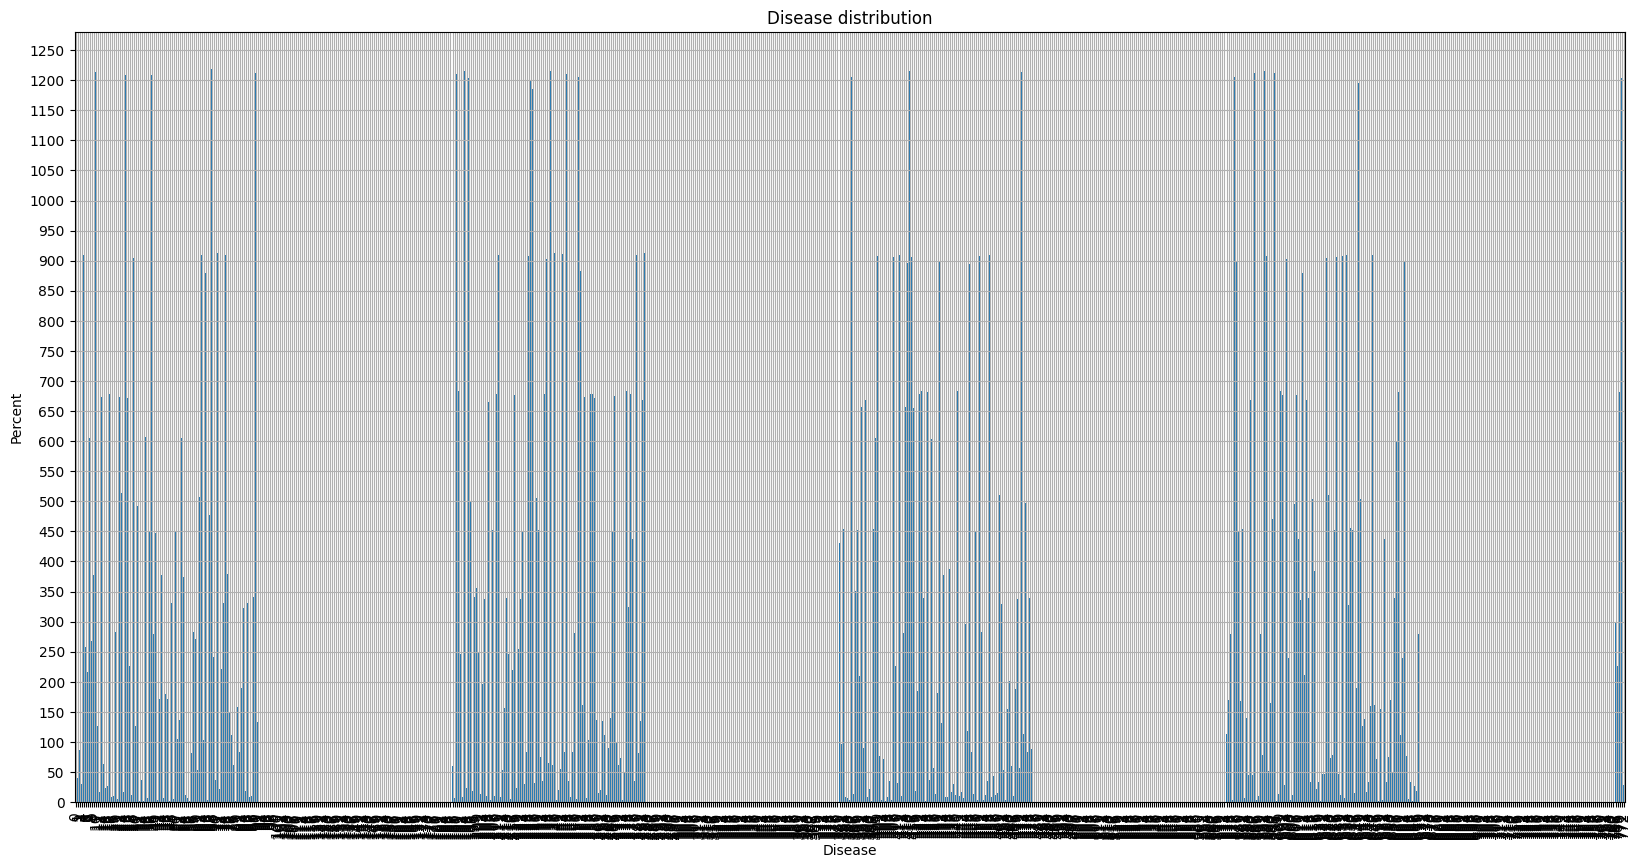

In [6]:
balance_count = patients_with_labels["Disease"].groupby(patients_with_labels["Disease"]).count()
balance_percent = balance_count

balance_percent.plot(
    kind="bar",
    figsize=(20, 10),
    title="Disease distribution",
    grid=True,
    ylabel="Percent",
    xlabel="Disease",
    yticks=np.arange(0, 1300, 50),
)

## Remove diseases with less than 3 samples

In [7]:
diseases_to_remove = balance_count[balance_count < 3].index

patients_with_labels = patients_with_labels[
    ~patients_with_labels["Disease"].isin(diseases_to_remove)
]

diseases_to_remove = [inverted_mapping.get(key) for key in diseases_to_remove]
diseases_to_remove

patients = patients[patients["Disease"].isin(diseases_to_remove) == False]

diseases_list = patients["Disease"].unique()
pd.DataFrame(diseases_list, columns=["Disease"]).to_csv(
    "../dataset/diseases.csv", index=False
)

In [8]:
patients_with_labels

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness,Disease
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,647
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,647
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,647
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,647
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,527
246941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,527
246942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,527
246943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,527


## Compute adjacency matrix

In [9]:
adjacency_matrix = patients.groupby("Disease").sum()

adjacency_matrix = adjacency_matrix.reset_index()
#adjacency_matrix = adjacency_matrix.drop(["Disease"], axis=1)

adjacency_matrix = adjacency_matrix.apply(
    lambda x: x.map(lambda val: 1 if val != 0 else 0)
)
#adjacency_matrix.insert(0, "Disease", patients["Disease"].unique())
adjacency_matrix.head()

,Disease,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check for isolated nodes

In [10]:
# Identify diseases without symptoms
diseases_without_symptoms = adjacency_matrix[
    adjacency_matrix.iloc[:, 1:].sum(axis=1) == 0
]

# Identify symptoms without diseases
symptoms_without_diseases = adjacency_matrix.columns[1:][
    adjacency_matrix.iloc[:, 1:].sum(axis=0) == 0
]
print("Diseases without symptoms:")
print(len(diseases_without_symptoms))
print("Symptoms without diseases:")
print(len(symptoms_without_diseases))
print(symptoms_without_diseases)

# Remove diseases without symptoms and symptoms without diseases
filtered_df = adjacency_matrix[adjacency_matrix.iloc[:, 1:].sum(axis=1) > 0]
filtered_df = filtered_df.drop(columns=symptoms_without_diseases)
print("Removed :",len(symptoms_without_diseases)," columns of ",len(adjacency_matrix.columns)-1)

Diseases without symptoms:
0
Symptoms without diseases:
52
Index(['pus in sputum', 'underweight', 'arm cramps or spasms',
       'abnormal appearing tongue', 'pallor', 'shoulder cramps or spasms',
       'joint stiffness or tightness', 'eye strain', 'pus in urine',
       'abnormal size or shape of ear', 'elbow cramps or spasms',
       'feeling hot and cold', 'nailbiting', 'hip swelling',
       'foot or toe cramps or spasms', 'low back swelling', 'hip lump or mass',
       'feeling hot', 'feet turned in', 'elbow stiffness or tightness',
       'mass on ear', 'throat irritation', 'swollen tongue',
       'disturbance of smell or taste', 'discharge in stools',
       'pupils unequal', 'thirst', 'sleepwalking', 'skin oiliness',
       'knee cramps or spasms', 'posture problems', 'bleeding in mouth',
       'tongue bleeding', 'change in skin mole size or color', 'polyuria',
       'infrequent menstruation', 'mass on vulva', 'jaw pain',
       'eyelid retracted', 'elbow lump or mass', 'to

### Save adjacency matrix for Gephi

In [11]:
filtered_df_gephi = filtered_df.copy()
filtered_df_gephi.drop(columns=["Disease"], inplace=True)
filtered_df_gephi.insert(0, "Disease", patients["Disease"])
filtered_df_gephi.to_csv("../dataset/large_adjacency_matrix_gephi.csv", index=False)

### Remove diseases with no symptoms

In [12]:
filtered_df.drop(columns=["Disease"], inplace=True)
print(filtered_df.columns)
filtered_df.head()

Index(['anxiety and nervousness', 'depression', 'shortness of breath',
       'depressive or psychotic symptoms', 'sharp chest pain', 'dizziness',
       'insomnia', 'abnormal involuntary movements', 'chest tightness',
       'palpitations',
       ...
       'joint swelling', 'redness in or around nose', 'wrinkles on skin',
       'foot or toe weakness', 'hand or finger cramps or spasms',
       'back stiffness or tightness', 'wrist lump or mass', 'low urine output',
       'sore in nose', 'ankle weakness'],
      dtype='object', length=325)


,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,joint swelling,redness in or around nose,wrinkles on skin,foot or toe weakness,hand or finger cramps or spasms,back stiffness or tightness,wrist lump or mass,low urine output,sore in nose,ankle weakness
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Save adjacency matrix

In [13]:
filtered_df.to_csv("../dataset/large_adjacency_matrix.csv",compression='gzip', index=False)

### Remove symptoms with no diseases from the dataset

In [14]:
patients.drop(columns=symptoms_without_diseases, inplace=True)
patients.to_csv("../dataset/large_dataset_NS.csv", compression="gzip", index=True)


symptoms = filtered_df.columns
symptoms_list = symptoms.unique()
pd.DataFrame(symptoms_list, columns=["symptom"]).to_csv(
    "../dataset/symptoms.csv", index=False
)

/tmp/ipykernel_5483/772347047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients.drop(columns=symptoms_without_diseases, inplace=True)


### Remove symptoms with no diseases from the one-hot encoded dataset

In [15]:
patients_with_labels.drop(columns=symptoms_without_diseases, inplace=True)
patients_with_labels.to_csv("../dataset/large_one_hot_encoding.csv",compression="gzip")

### Save the one-hot encoded dataset as features

In [16]:
# Store the one-hot-encoded DataFrame in a .npz file
tmp = np.array(patients_with_labels)
np.savez_compressed("../code/prediction_model/features/symptoms.npz", X = tmp[:,:-1], y = tmp[:,-1])

In [17]:
data = np.load("../code/prediction_model/features/symptoms.npz")
x, y = data["X"], data["y"]
print(x.shape, y.shape)

(246914, 325) (246914,)
